In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


df=pd.read_excel(r"F:/Ibm Projects/14.Trip based modelling of fuel consumption in modern fleet vechiles/Data/measurements2.xlsx")

print(df.head())

XLRDError: Excel xlsx file; not supported

<AxesSubplot:>

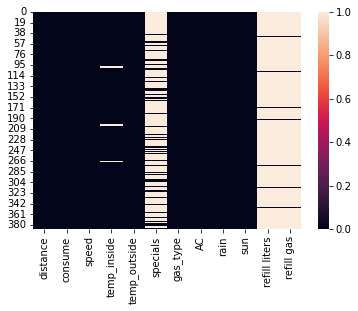

In [2]:
import seaborn as sns
sns.heatmap(df.isnull())

In [3]:
df.isnull()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,True
2,False,False,False,False,False,True,False,False,False,False,True,True
3,False,False,False,False,False,True,False,False,False,False,True,True
4,False,False,False,False,False,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
383,False,False,False,False,False,True,False,False,False,False,True,True
384,False,False,False,False,False,False,False,False,False,False,True,True
385,False,False,False,False,False,True,False,False,False,False,True,True
386,False,False,False,False,False,False,False,False,False,False,True,True


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


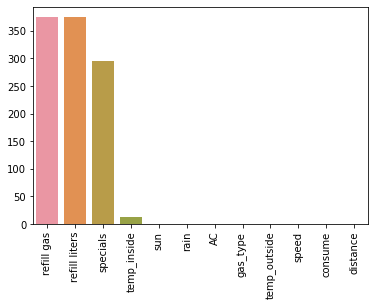

In [4]:
null_values=df.isnull().sum().sort_values(ascending=False)
ax=sns.barplot(null_values.index,null_values.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
import matplotlib.pyplot as plt
plt.show()

<AxesSubplot:>

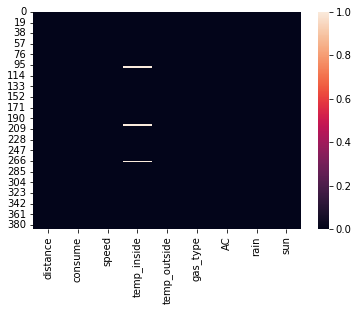

In [5]:
df.drop(['refill gas','refill liters','specials'],axis=1,inplace=True)
sns.heatmap(df.isnull())

In [6]:
temp_inside_mean=np.mean(df['temp_inside'])

TypeError: can only concatenate str (not "int") to str

In [ ]:
print(temp_inside_mean)

In [ ]:
df['temp_inside'].fillna(temp_inside_mean,inplace=True)

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [ ]:
x=df.drop(['consume','gas_type'],axis=1)

In [ ]:
y=df['consume']

In [ ]:
x.columns

In [ ]:
x=x.values
y=y.values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
l.fit(x_train,y_train)

In [ ]:
x_train.shape

In [ ]:
y_pred=l.predict(x_test)

In [ ]:
print(l.coef_,l.intercept_)

In [ ]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
dum1=pd.get_dummies(df['gas_type'])
print(dum1)

In [ ]:
df=pd.concat([df,dum1],axis=1)

In [ ]:
df.drop('gas_type',axis=1,inplace=True)

In [ ]:
x1=df.drop('consume',axis=1)

In [ ]:
y1=df['consume']

In [ ]:
x1.columns

In [ ]:
x1=x1.values
y1=y1.values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=42)


In [ ]:
l.fit(x_train,y_train)

In [ ]:
y_pred_1=l.predict(x_test)
print(y_pred_1)

In [ ]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))

In [ ]:
x_train.shape

In [ ]:
x_train[0]

In [ ]:
import joblib
joblib.dump(l,'model.save')